## Model

In [536]:
!pip install xgboost
!pip install lightgbm

In [540]:
import pandas as pd
import joblib
import lightgbm as lgb
import matplotlib.pyplot as plt
import xgboost as xgb
import seaborn as sns
import numpy as np
import re
from sklearn.svm import SVC
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve, auc ,classification_report, roc_auc_score, roc_curve, average_precision_score
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from xgboost import XGBClassifier


In [542]:
df_target= pd.read_excel("../TRAIN/TRAINING_SOLUTIONS.xlsx")

In [544]:
df_target.head()

,participant_id,ADHD_Outcome,Sex_F
0,UmrK0vMLopoR,1,1
1,CPaeQkhcjg7d,1,0
2,Nb4EetVPm3gs,1,0
3,p4vPhVu91o4b,1,1
4,M09PXs7arQ5E,1,1


In [545]:
df_target.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1213 entries, 0 to 1212
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   participant_id  1213 non-null   object
 1   ADHD_Outcome    1213 non-null   int64 
 2   Sex_F           1213 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 28.6+ KB


In [546]:
df_target=df_target.drop(columns=['participant_id'])

In [547]:
corr_matrix = df_target.corr()
print (corr_matrix)

              ADHD_Outcome     Sex_F
ADHD_Outcome      1.000000 -0.130836
Sex_F            -0.130836  1.000000


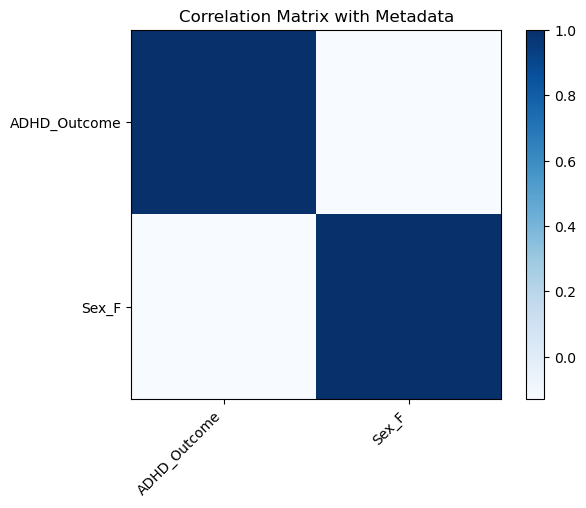

In [552]:
plt.imshow(corr_matrix, cmap='Blues')
plt.colorbar()

variables = []
for i in corr_matrix.columns:
    variables.append(i)

plt.title("Correlation Matrix with Metadata")
plt.xticks(range(len(corr_matrix)), variables, rotation=45, ha='right')
plt.yticks(range(len(corr_matrix)), variables)

plt.show()

In [553]:
df1_target= pd.read_pickle("ProcessedData/processed_target1.pkl")

In [554]:
df1_target=df1_target.drop(columns=["participant_id"])

In [555]:
df1_target.head()

,Basic_Demos_Enroll_Year,PreInt_Demos_Fam_Child_Race,Barratt_Barratt_P1_Edu,Barratt_Barratt_P1_Occ,Barratt_Barratt_P2_Edu,Barratt_Barratt_P2_Occ,Basic_Demos_Study_Site_1,Basic_Demos_Study_Site_2,Basic_Demos_Study_Site_3,Basic_Demos_Study_Site_4,...,SDQ_SDQ_Emotional_Problems,SDQ_SDQ_Externalizing,SDQ_SDQ_Generating_Impact,SDQ_SDQ_Hyperactivity,SDQ_SDQ_Internalizing,SDQ_SDQ_Peer_Problems,SDQ_SDQ_Prosocial,MRI_Track_Age_at_Scan,ADHD_Outcome,Sex_F
0,2016,0,21,45,21,45,1,0,0,0,...,1.0,5.0,0.0,5.0,1.0,0.0,10.0,8.979603,1,1
1,2019,2,15,15,0,0,0,0,1,0,...,6.0,8.0,7.0,8.0,10.0,4.0,5.0,12.734177,1,0
2,2016,8,18,40,0,0,1,0,0,0,...,2.0,8.0,5.0,7.0,6.0,4.0,9.0,8.239904,1,0
3,2018,8,15,30,18,0,0,0,1,0,...,4.0,16.0,9.0,10.0,8.0,4.0,6.0,9.523203,1,1
4,2019,1,15,20,0,0,0,0,1,0,...,4.0,11.0,4.0,10.0,7.0,3.0,9.0,8.940679,1,1


In [556]:
corr_matrix = df1_target.corr()
print(corr_matrix)

                                    Basic_Demos_Enroll_Year  \
Basic_Demos_Enroll_Year                            1.000000   
PreInt_Demos_Fam_Child_Race                        0.017209   
Barratt_Barratt_P1_Edu                             0.118140   
Barratt_Barratt_P1_Occ                             0.061509   
Barratt_Barratt_P2_Edu                             0.103347   
Barratt_Barratt_P2_Occ                             0.097671   
Basic_Demos_Study_Site_1                          -0.430542   
Basic_Demos_Study_Site_2                          -0.148603   
Basic_Demos_Study_Site_3                           0.223624   
Basic_Demos_Study_Site_4                           0.407879   
PreInt_Demos_Fam_Child_Ethnicity_0                 0.013172   
PreInt_Demos_Fam_Child_Ethnicity_1                 0.032464   
PreInt_Demos_Fam_Child_Ethnicity_2                -0.033785   
PreInt_Demos_Fam_Child_Ethnicity_3                -0.075495   
MRI_Track_Scan_Location_0                         -0.07

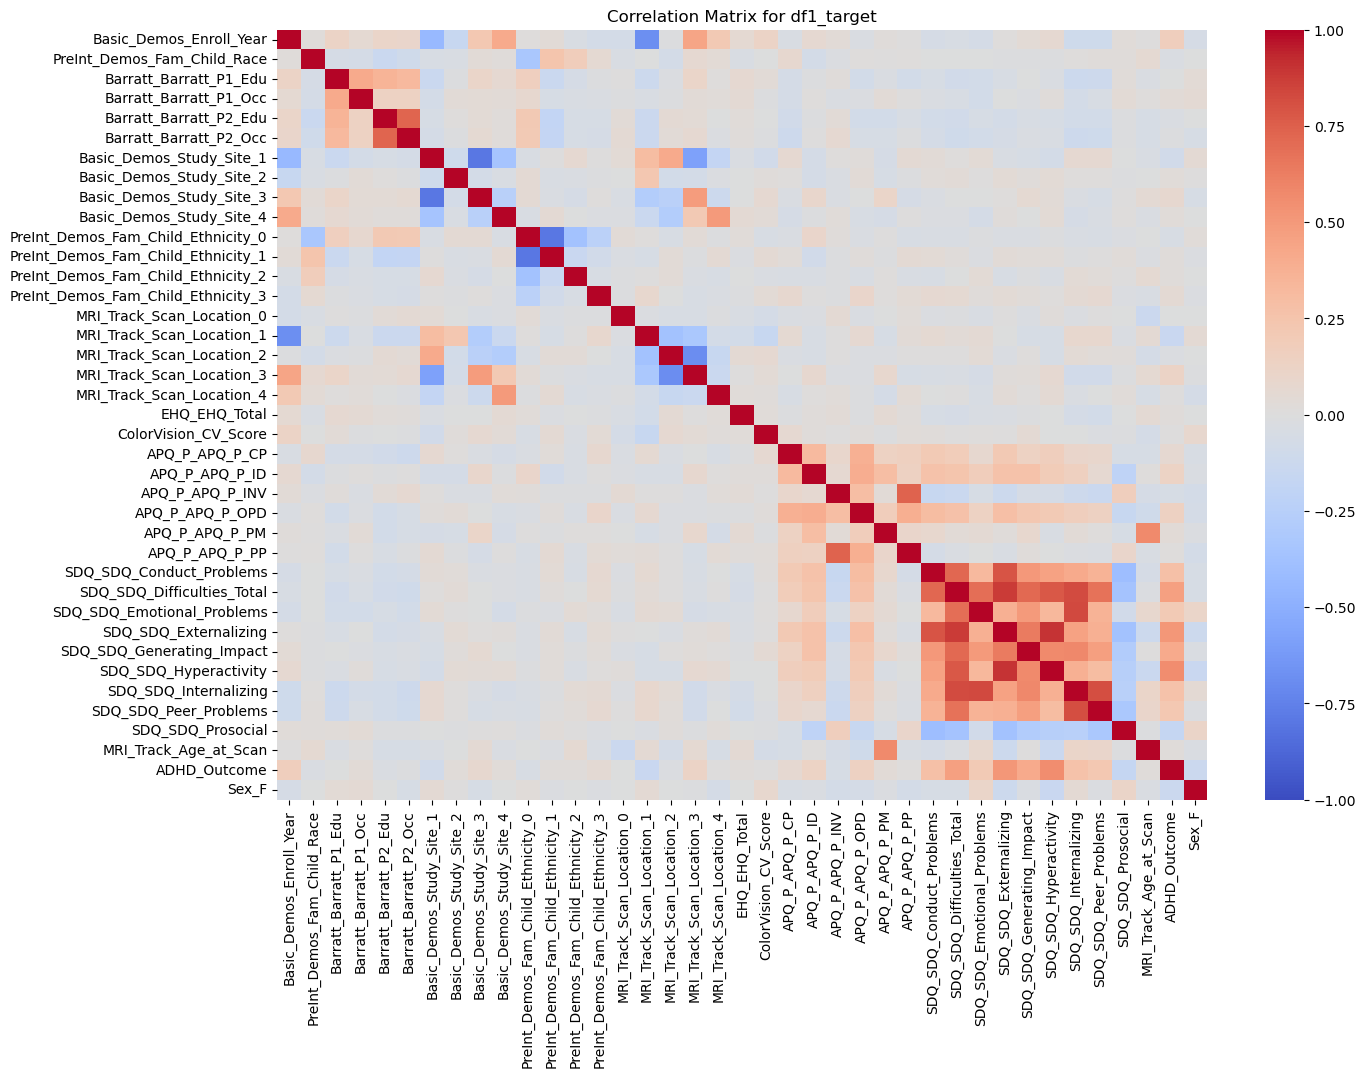

In [557]:
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=False, cmap="coolwarm", vmin=-1, vmax=1)

plt.title("Correlation Matrix for df1_target")
plt.show()


In [566]:
corr_matrix = df1_target.corr()
mask = np.triu(np.ones(corr_matrix.shape), k=0) 
corr_pairs = corr_matrix.where(mask == 0).stack().sort_values(ascending=False)
strong_corrs = corr_pairs[abs(corr_pairs) > 0.5]
print(strong_corrs)



SDQ_SDQ_Hyperactivity               SDQ_SDQ_Externalizing                 0.901635
SDQ_SDQ_Externalizing               SDQ_SDQ_Difficulties_Total            0.880004
SDQ_SDQ_Internalizing               SDQ_SDQ_Emotional_Problems            0.833418
                                    SDQ_SDQ_Difficulties_Total            0.826949
SDQ_SDQ_Peer_Problems               SDQ_SDQ_Internalizing                 0.819531
SDQ_SDQ_Externalizing               SDQ_SDQ_Conduct_Problems              0.795178
SDQ_SDQ_Hyperactivity               SDQ_SDQ_Difficulties_Total            0.775414
APQ_P_APQ_P_PP                      APQ_P_APQ_P_INV                       0.739292
Barratt_Barratt_P2_Occ              Barratt_Barratt_P2_Edu                0.728974
SDQ_SDQ_Difficulties_Total          SDQ_SDQ_Conduct_Problems              0.725036
SDQ_SDQ_Generating_Impact           SDQ_SDQ_Difficulties_Total            0.717915
SDQ_SDQ_Emotional_Problems          SDQ_SDQ_Difficulties_Total            0.687964
SDQ_

In [567]:
X = df1_target.drop(columns=["Sex_F"])  
y = df1_target["Sex_F"]

In [568]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X, df1_target["Sex_F"])

importances = rf.feature_importances_
feature_names = X.columns
sorted_features = sorted(zip(feature_names, importances), key=lambda x: x[1], reverse=True)

print("Top features for Sex_F:")
for feature, importance in sorted_features[:10]: 
    print(f"{feature}: {importance:.4f}")


Top features for Sex_F:
MRI_Track_Age_at_Scan: 0.0716
APQ_P_APQ_P_INV: 0.0547
EHQ_EHQ_Total: 0.0519
APQ_P_APQ_P_ID: 0.0512
APQ_P_APQ_P_PM: 0.0476
APQ_P_APQ_P_OPD: 0.0467
APQ_P_APQ_P_PP: 0.0455
SDQ_SDQ_Difficulties_Total: 0.0451
SDQ_SDQ_Externalizing: 0.0420
SDQ_SDQ_Hyperactivity: 0.0418


In [572]:
df2_target= pd.read_pickle("ProcessedData/processed_target2.pkl")

In [573]:
df2_target.head()

,participant_id,0throw_1thcolumn,0throw_2thcolumn,0throw_3thcolumn,0throw_4thcolumn,0throw_5thcolumn,0throw_6thcolumn,0throw_7thcolumn,0throw_8thcolumn,0throw_9thcolumn,...,195throw_198thcolumn,195throw_199thcolumn,196throw_197thcolumn,196throw_198thcolumn,196throw_199thcolumn,197throw_198thcolumn,197throw_199thcolumn,198throw_199thcolumn,ADHD_Outcome,Sex_F
0,70z8Q2xdTXM3,0.093473,0.146902,0.067893,0.015141,0.070221,0.063997,0.055382,-0.035335,0.068583,...,-0.050968,-0.014365,0.128066,0.112646,-0.058980,0.028228,0.133582,0.143372,1,0
1,WHWymJu6zNZi,0.029580,0.179323,0.112933,0.038291,0.104899,0.064250,0.008488,0.077505,-0.004750,...,0.020891,0.017754,0.094040,0.035141,0.032537,0.075007,0.115350,0.138200,1,1
2,4PAQp1M6EyAo,-0.051580,0.139734,0.068295,0.046991,0.111085,0.026978,0.151377,0.021198,0.083721,...,0.028773,0.024556,0.166343,0.058925,0.035485,0.063661,0.042862,0.162162,1,1
3,obEacy4Of68I,0.016273,0.204702,0.115980,0.043103,0.056431,0.057615,0.055773,0.075030,0.001033,...,0.018607,0.016193,0.072955,0.130135,0.056120,0.084784,0.114148,0.190584,1,1
4,s7WzzDcmDOhF,0.065771,0.098714,0.097604,0.112988,0.071139,0.085607,0.019392,-0.036403,-0.020375,...,-0.047530,-0.031443,0.221213,0.007343,0.005763,0.083820,0.079582,0.067269,1,1


In [576]:
df2_target[df2_target['participant_id']=='UmrK0vMLopoR']

,participant_id,0throw_1thcolumn,0throw_2thcolumn,0throw_3thcolumn,0throw_4thcolumn,0throw_5thcolumn,0throw_6thcolumn,0throw_7thcolumn,0throw_8thcolumn,0throw_9thcolumn,...,195throw_198thcolumn,195throw_199thcolumn,196throw_197thcolumn,196throw_198thcolumn,196throw_199thcolumn,197throw_198thcolumn,197throw_199thcolumn,198throw_199thcolumn,ADHD_Outcome,Sex_F
749,UmrK0vMLopoR,-0.03982,0.177577,0.057224,0.037571,0.118154,0.050951,0.090341,0.023182,-0.022061,...,-0.058396,-0.041544,0.142806,-0.006377,0.108005,0.148327,0.09323,-0.004984,1,1


In [578]:
df1_target= pd.read_pickle("ProcessedData/processed_target1.pkl")

In [579]:
df1_target.head()

,participant_id,Basic_Demos_Enroll_Year,PreInt_Demos_Fam_Child_Race,Barratt_Barratt_P1_Edu,Barratt_Barratt_P1_Occ,Barratt_Barratt_P2_Edu,Barratt_Barratt_P2_Occ,Basic_Demos_Study_Site_1,Basic_Demos_Study_Site_2,Basic_Demos_Study_Site_3,...,SDQ_SDQ_Emotional_Problems,SDQ_SDQ_Externalizing,SDQ_SDQ_Generating_Impact,SDQ_SDQ_Hyperactivity,SDQ_SDQ_Internalizing,SDQ_SDQ_Peer_Problems,SDQ_SDQ_Prosocial,MRI_Track_Age_at_Scan,ADHD_Outcome,Sex_F
0,UmrK0vMLopoR,2016,0,21,45,21,45,1,0,0,...,1.0,5.0,0.0,5.0,1.0,0.0,10.0,8.979603,1,1
1,CPaeQkhcjg7d,2019,2,15,15,0,0,0,0,1,...,6.0,8.0,7.0,8.0,10.0,4.0,5.0,12.734177,1,0
2,Nb4EetVPm3gs,2016,8,18,40,0,0,1,0,0,...,2.0,8.0,5.0,7.0,6.0,4.0,9.0,8.239904,1,0
3,p4vPhVu91o4b,2018,8,15,30,18,0,0,0,1,...,4.0,16.0,9.0,10.0,8.0,4.0,6.0,9.523203,1,1
4,M09PXs7arQ5E,2019,1,15,20,0,0,0,0,1,...,4.0,11.0,4.0,10.0,7.0,3.0,9.0,8.940679,1,1


In [582]:
df = pd.merge(df1_target, df2_target)

In [583]:
df.head()

,participant_id,Basic_Demos_Enroll_Year,PreInt_Demos_Fam_Child_Race,Barratt_Barratt_P1_Edu,Barratt_Barratt_P1_Occ,Barratt_Barratt_P2_Edu,Barratt_Barratt_P2_Occ,Basic_Demos_Study_Site_1,Basic_Demos_Study_Site_2,Basic_Demos_Study_Site_3,...,195throw_196thcolumn,195throw_197thcolumn,195throw_198thcolumn,195throw_199thcolumn,196throw_197thcolumn,196throw_198thcolumn,196throw_199thcolumn,197throw_198thcolumn,197throw_199thcolumn,198throw_199thcolumn
0,UmrK0vMLopoR,2016,0,21,45,21,45,1,0,0,...,-0.037630,-0.072599,-0.058396,-0.041544,0.142806,-0.006377,0.108005,0.148327,0.093230,-0.004984
1,CPaeQkhcjg7d,2019,2,15,15,0,0,0,0,1,...,0.014106,-0.001084,-0.025624,-0.031863,0.162011,0.067439,0.017155,0.088893,0.064094,0.194381
2,Nb4EetVPm3gs,2016,8,18,40,0,0,1,0,0,...,-0.040456,0.018640,0.010771,-0.044341,0.128386,0.047282,0.087678,0.146221,-0.009425,0.035150
3,p4vPhVu91o4b,2018,8,15,30,18,0,0,0,1,...,-0.016356,0.025618,-0.007152,0.032584,0.121726,0.045089,0.154464,0.106817,0.065336,0.234708
4,M09PXs7arQ5E,2019,1,15,20,0,0,0,0,1,...,-0.056285,-0.031508,-0.010196,0.035638,0.074978,0.030579,0.025640,0.118199,0.112522,0.143666


In [589]:
train_df_ids = df['participant_id']

In [591]:
df=df.drop(columns=['participant_id'])

In [593]:
df_sampled = df.sample(frac=0.1, random_state=42)  # 10% sample
corr_matrix = df_sampled.corr()


In [594]:
print(corr_matrix)

                             Basic_Demos_Enroll_Year  \
Basic_Demos_Enroll_Year                     1.000000   
PreInt_Demos_Fam_Child_Race                -0.031738   
Barratt_Barratt_P1_Edu                      0.119859   
Barratt_Barratt_P1_Occ                      0.108877   
Barratt_Barratt_P2_Edu                      0.325772   
...                                              ...   
196throw_198thcolumn                       -0.065931   
196throw_199thcolumn                        0.062543   
197throw_198thcolumn                        0.172686   
197throw_199thcolumn                        0.119997   
198throw_199thcolumn                        0.045314   

                             PreInt_Demos_Fam_Child_Race  \
Basic_Demos_Enroll_Year                        -0.031738   
PreInt_Demos_Fam_Child_Race                     1.000000   
Barratt_Barratt_P1_Edu                         -0.041014   
Barratt_Barratt_P1_Occ                         -0.097418   
Barratt_Barratt_P2_Edu     

In [595]:
mask = np.triu(np.ones(corr_matrix.shape), k=0) 

corr_pairs = corr_matrix.where(mask == 0).stack().sort_values(ascending=False)

strong_corrs = corr_pairs[abs(corr_pairs) > 0.5]
print(strong_corrs)

SDQ_SDQ_Hyperactivity               SDQ_SDQ_Externalizing                 0.924985
SDQ_SDQ_Externalizing               SDQ_SDQ_Difficulties_Total            0.882892
SDQ_SDQ_Peer_Problems               SDQ_SDQ_Internalizing                 0.820502
SDQ_SDQ_Internalizing               SDQ_SDQ_Emotional_Problems            0.801621
Barratt_Barratt_P2_Occ              Barratt_Barratt_P2_Edu                0.801602
                                                                            ...   
MRI_Track_Scan_Location_3           Basic_Demos_Study_Site_1             -0.627238
MRI_Track_Scan_Location_1           Basic_Demos_Enroll_Year              -0.647938
PreInt_Demos_Fam_Child_Ethnicity_1  PreInt_Demos_Fam_Child_Ethnicity_0   -0.690721
MRI_Track_Scan_Location_3           MRI_Track_Scan_Location_2            -0.716158
Basic_Demos_Study_Site_3            Basic_Demos_Study_Site_1             -0.763150
Length: 70, dtype: float64


In [596]:
X = df.drop(columns=["Sex_F"]) 
y = df["Sex_F"]  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
print("Model Accuracy:", accuracy_score(y_test, y_pred))


Model Accuracy: 0.6954732510288066


In [599]:
feature_importances = pd.Series(rf.feature_importances_, index=X.columns)
sorted_importances = feature_importances.sort_values(ascending=False)

print("Top 10 Features by Importance:")
print(sorted_importances.head(10))


Top 10 Features by Importance:
171throw_184thcolumn    0.001080
131throw_198thcolumn    0.001033
101throw_138thcolumn    0.000995
151throw_180thcolumn    0.000907
164throw_189thcolumn    0.000900
80throw_126thcolumn     0.000892
80throw_178thcolumn     0.000892
140throw_179thcolumn    0.000855
31throw_118thcolumn     0.000852
33throw_111thcolumn     0.000825
dtype: float64


In [601]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.70      0.99      0.82       171
           1       0.00      0.00      0.00        72

    accuracy                           0.70       243
   macro avg       0.35      0.49      0.41       243
weighted avg       0.49      0.70      0.58       243



In [602]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)


In [603]:
rf = RandomForestClassifier(random_state=42, class_weight='balanced')
rf.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', random_state=42)

In [604]:
lr = LogisticRegression(class_weight='balanced', random_state=42)
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)
y_pred_proba_lr = lr.predict_proba(X_test)[:, 1]


print("Logistic Regression - Classification Report:")
print(classification_report(y_test, y_pred_lr))

roc_auc_lr = roc_auc_score(y_test, y_pred_proba_lr)
print(f"ROC-AUC for Logistic Regression: {roc_auc_lr:.4f}")


pr_auc_lr = average_precision_score(y_test, y_pred_proba_lr)
print(f"PR-AUC for Logistic Regression: {pr_auc_lr:.4f}")


C:\Users\Aliso\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression - Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.64      0.70       171
           1       0.39      0.56      0.46        72

    accuracy                           0.61       243
   macro avg       0.58      0.60      0.58       243
weighted avg       0.66      0.61      0.63       243

ROC-AUC for Logistic Regression: 0.6258
PR-AUC for Logistic Regression: 0.4375


## Test Data

In [750]:
df_categorical_test= pd.read_excel("../TEST/TEST_CATEGORICAL.xlsx")

In [752]:
df_categorical_test.head()

,participant_id,Basic_Demos_Enroll_Year,Basic_Demos_Study_Site,PreInt_Demos_Fam_Child_Ethnicity,PreInt_Demos_Fam_Child_Race,MRI_Track_Scan_Location,Barratt_Barratt_P1_Edu,Barratt_Barratt_P1_Occ,Barratt_Barratt_P2_Edu,Barratt_Barratt_P2_Occ
0,Cfwaf5FX7jWK,2022,4,0.0,0.0,4,21.0,30.0,18.0,30.0
1,vhGrzmvA3Hjq,2023,4,0.0,0.0,4,21.0,45.0,NaN,30.0
2,ULliyEXjy4OV,2022,4,0.0,0.0,4,21.0,40.0,18.0,40.0
3,LZfeAb1xMtql,2022,4,0.0,0.0,3,21.0,45.0,21.0,45.0
4,EnFOUv0YK1RG,2022,4,2.0,0.0,4,18.0,0.0,21.0,45.0


In [753]:
df_quantitative_test=pd.read_excel("../TEST/TEST_QUANTITATIVE_METADATA.xlsx")

In [754]:
df_quantitative_test.head()

,participant_id,EHQ_EHQ_Total,ColorVision_CV_Score,APQ_P_APQ_P_CP,APQ_P_APQ_P_ID,APQ_P_APQ_P_INV,APQ_P_APQ_P_OPD,APQ_P_APQ_P_PM,APQ_P_APQ_P_PP,SDQ_SDQ_Conduct_Problems,SDQ_SDQ_Difficulties_Total,SDQ_SDQ_Emotional_Problems,SDQ_SDQ_Externalizing,SDQ_SDQ_Generating_Impact,SDQ_SDQ_Hyperactivity,SDQ_SDQ_Internalizing,SDQ_SDQ_Peer_Problems,SDQ_SDQ_Prosocial,MRI_Track_Age_at_Scan
0,Cfwaf5FX7jWK,60.03,14.0,5.0,16.0,41.0,19.0,11.0,26.0,2.0,12.0,3.0,9.0,2.0,7.0,3.0,0.0,8.0,8.992813
1,vhGrzmvA3Hjq,86.71,12.0,3.0,13.0,43.0,18.0,15.0,28.0,2.0,16.0,8.0,5.0,7.0,3.0,11.0,3.0,9.0,12.324093
2,ULliyEXjy4OV,26.68,13.0,3.0,14.0,36.0,16.0,14.0,25.0,1.0,7.0,1.0,6.0,1.0,5.0,1.0,0.0,9.0,7.770933
3,LZfeAb1xMtql,93.38,13.0,3.0,19.0,41.0,17.0,18.0,27.0,4.0,15.0,4.0,10.0,8.0,6.0,5.0,1.0,6.0,9.304814
4,EnFOUv0YK1RG,-93.38,14.0,3.0,13.0,42.0,19.0,16.0,28.0,2.0,18.0,6.0,12.0,5.0,10.0,6.0,0.0,10.0,8.261350


In [755]:
df_functional_test= pd.read_csv("../TEST/TEST_FUNCTIONAL_CONNECTOME_MATRICES.csv")

In [756]:
df_functional_test.head()

,participant_id,0throw_1thcolumn,0throw_2thcolumn,0throw_3thcolumn,0throw_4thcolumn,0throw_5thcolumn,0throw_6thcolumn,0throw_7thcolumn,0throw_8thcolumn,0throw_9thcolumn,...,195throw_196thcolumn,195throw_197thcolumn,195throw_198thcolumn,195throw_199thcolumn,196throw_197thcolumn,196throw_198thcolumn,196throw_199thcolumn,197throw_198thcolumn,197throw_199thcolumn,198throw_199thcolumn
0,Cfwaf5FX7jWK,0.548480,0.713607,0.557319,0.524369,0.693364,0.770032,0.724406,0.390118,0.547912,...,0.080423,-0.054581,-0.088163,-0.028574,0.444847,0.350149,-0.012601,0.665750,0.560565,0.555732
1,vhGrzmvA3Hjq,0.427740,0.363022,0.402862,0.363003,0.534558,0.345347,0.409471,0.303328,0.402515,...,0.198009,-0.000724,0.083122,0.033043,0.687497,0.306229,0.717485,0.461809,0.559632,0.350027
2,ULliyEXjy4OV,0.139572,0.390106,-0.087041,0.196852,0.088148,0.023843,0.381782,0.068979,0.377488,...,0.051319,0.023630,-0.056819,0.117396,0.576086,0.517831,0.527044,0.605038,0.609856,0.750987
3,LZfeAb1xMtql,0.133561,0.778326,0.416355,0.471840,0.568460,0.633660,0.501113,0.345461,0.467943,...,0.046183,-0.238962,0.121868,-0.260970,0.646818,0.594902,0.608156,0.595459,0.683189,0.542296
4,EnFOUv0YK1RG,0.126699,0.575446,0.509422,0.363193,0.427544,0.449924,0.451796,0.223927,0.298248,...,0.315734,0.002234,0.290791,0.344149,0.480214,0.539824,0.447322,0.293088,0.148529,0.539823


In [757]:
test_df1 = pd.merge(df_categorical_test,df_quantitative_test)

In [758]:
test_df=pd.merge(test_df1, df_functional_test)

In [759]:
test_df_ids=test_df

In [760]:
test_df.head()

,participant_id,Basic_Demos_Enroll_Year,Basic_Demos_Study_Site,PreInt_Demos_Fam_Child_Ethnicity,PreInt_Demos_Fam_Child_Race,MRI_Track_Scan_Location,Barratt_Barratt_P1_Edu,Barratt_Barratt_P1_Occ,Barratt_Barratt_P2_Edu,Barratt_Barratt_P2_Occ,...,195throw_196thcolumn,195throw_197thcolumn,195throw_198thcolumn,195throw_199thcolumn,196throw_197thcolumn,196throw_198thcolumn,196throw_199thcolumn,197throw_198thcolumn,197throw_199thcolumn,198throw_199thcolumn
0,Cfwaf5FX7jWK,2022,4,0.0,0.0,4,21.0,30.0,18.0,30.0,...,0.080423,-0.054581,-0.088163,-0.028574,0.444847,0.350149,-0.012601,0.665750,0.560565,0.555732
1,vhGrzmvA3Hjq,2023,4,0.0,0.0,4,21.0,45.0,NaN,30.0,...,0.198009,-0.000724,0.083122,0.033043,0.687497,0.306229,0.717485,0.461809,0.559632,0.350027
2,ULliyEXjy4OV,2022,4,0.0,0.0,4,21.0,40.0,18.0,40.0,...,0.051319,0.023630,-0.056819,0.117396,0.576086,0.517831,0.527044,0.605038,0.609856,0.750987
3,LZfeAb1xMtql,2022,4,0.0,0.0,3,21.0,45.0,21.0,45.0,...,0.046183,-0.238962,0.121868,-0.260970,0.646818,0.594902,0.608156,0.595459,0.683189,0.542296
4,EnFOUv0YK1RG,2022,4,2.0,0.0,4,18.0,0.0,21.0,45.0,...,0.315734,0.002234,0.290791,0.344149,0.480214,0.539824,0.447322,0.293088,0.148529,0.539823


In [761]:
unique_counts = test_df.nunique()
print(unique_counts[unique_counts<6])


Basic_Demos_Enroll_Year             5
Basic_Demos_Study_Site              2
PreInt_Demos_Fam_Child_Ethnicity    4
MRI_Track_Scan_Location             2
dtype: int64


In [762]:
missing=test_df.isnull().sum()
print(missing[missing> 0])

PreInt_Demos_Fam_Child_Ethnicity     3
PreInt_Demos_Fam_Child_Race          6
Barratt_Barratt_P1_Edu               1
Barratt_Barratt_P1_Occ               1
Barratt_Barratt_P2_Edu              36
Barratt_Barratt_P2_Occ              42
EHQ_EHQ_Total                        1
ColorVision_CV_Score                 9
APQ_P_APQ_P_CP                      15
APQ_P_APQ_P_ID                      15
APQ_P_APQ_P_INV                     15
APQ_P_APQ_P_OPD                     15
APQ_P_APQ_P_PM                      15
APQ_P_APQ_P_PP                      15
SDQ_SDQ_Conduct_Problems            30
SDQ_SDQ_Difficulties_Total          30
SDQ_SDQ_Emotional_Problems          30
SDQ_SDQ_Externalizing               30
SDQ_SDQ_Generating_Impact           30
SDQ_SDQ_Hyperactivity               30
SDQ_SDQ_Internalizing               30
SDQ_SDQ_Peer_Problems               30
SDQ_SDQ_Prosocial                   30
dtype: int64


In [763]:
test_df[test_df['PreInt_Demos_Fam_Child_Ethnicity'].isnull()]

,participant_id,Basic_Demos_Enroll_Year,Basic_Demos_Study_Site,PreInt_Demos_Fam_Child_Ethnicity,PreInt_Demos_Fam_Child_Race,MRI_Track_Scan_Location,Barratt_Barratt_P1_Edu,Barratt_Barratt_P1_Occ,Barratt_Barratt_P2_Edu,Barratt_Barratt_P2_Occ,...,195throw_196thcolumn,195throw_197thcolumn,195throw_198thcolumn,195throw_199thcolumn,196throw_197thcolumn,196throw_198thcolumn,196throw_199thcolumn,197throw_198thcolumn,197throw_199thcolumn,198throw_199thcolumn
49,z0TcjaAHc8af,2022,4,NaN,NaN,4,NaN,NaN,NaN,NaN,...,0.006018,-0.076958,0.085048,-0.079458,0.585970,0.314718,0.378953,0.265000,0.521509,0.516675
77,FZZFnxIITvIb,2022,4,NaN,8.0,4,18.0,45.0,18.0,0.0,...,0.084115,0.278019,0.532459,0.453084,0.349669,0.086451,0.273299,0.348283,0.514404,0.770396
89,PJvfoHAcsFop,2022,4,NaN,1.0,3,21.0,35.0,NaN,NaN,...,-0.000137,0.163470,-0.019524,-0.117203,0.529522,-0.075166,0.253925,0.226185,0.437093,0.334206


In [776]:
test_df["PreInt_Demos_Fam_Child_Ethnicity"] = test_df["PreInt_Demos_Fam_Child_Ethnicity"].fillna(3).astype(int)

In [777]:
test_df[test_df['PreInt_Demos_Fam_Child_Race'].isnull()]

,participant_id,Basic_Demos_Enroll_Year,Basic_Demos_Study_Site,PreInt_Demos_Fam_Child_Ethnicity,PreInt_Demos_Fam_Child_Race,MRI_Track_Scan_Location,Barratt_Barratt_P1_Edu,Barratt_Barratt_P1_Occ,Barratt_Barratt_P2_Edu,Barratt_Barratt_P2_Occ,...,195throw_196thcolumn,195throw_197thcolumn,195throw_198thcolumn,195throw_199thcolumn,196throw_197thcolumn,196throw_198thcolumn,196throw_199thcolumn,197throw_198thcolumn,197throw_199thcolumn,198throw_199thcolumn
39,erkdzShJ7zHD,2022,4,0,NaN,3,15.0,0.0,15.0,NaN,...,0.017514,-0.298778,-0.342710,0.074207,0.676705,0.420986,0.331032,0.722172,0.276324,0.359208
49,z0TcjaAHc8af,2022,4,3,NaN,4,NaN,NaN,NaN,NaN,...,0.006018,-0.076958,0.085048,-0.079458,0.585970,0.314718,0.378953,0.265000,0.521509,0.516675
116,hRtu2jZGjsqu,2022,4,0,NaN,4,18.0,30.0,18.0,30.0,...,-0.141409,0.036122,0.345824,0.364935,0.643029,0.195904,0.187084,0.421216,0.462642,0.767641
198,tcKZk7TJNjXP,2023,4,0,NaN,4,21.0,45.0,18.0,0.0,...,-0.048878,-0.217615,-0.120482,-0.199595,0.660301,0.269543,0.291924,0.491262,0.497185,0.537227
222,h1NsELdECZtN,2022,4,0,NaN,4,21.0,40.0,21.0,40.0,...,-0.088644,-0.289402,-0.158885,-0.166853,0.619676,0.286117,0.363207,0.427598,0.595295,0.477818
238,uhrbzFdVttif,2023,4,0,NaN,4,18.0,45.0,18.0,45.0,...,-0.060728,-0.219644,-0.270225,-0.079842,0.673342,0.623444,0.264390,0.691652,0.277295,0.399951


In [778]:
test_df["PreInt_Demos_Fam_Child_Race"] = test_df["PreInt_Demos_Fam_Child_Race"].fillna(10).astype(int)

In [779]:
missing=test_df.isnull().sum()
print(missing[missing> 0])

Barratt_Barratt_P1_Edu         1
Barratt_Barratt_P1_Occ         1
Barratt_Barratt_P2_Edu        36
Barratt_Barratt_P2_Occ        42
EHQ_EHQ_Total                  1
ColorVision_CV_Score           9
APQ_P_APQ_P_CP                15
APQ_P_APQ_P_ID                15
APQ_P_APQ_P_INV               15
APQ_P_APQ_P_OPD               15
APQ_P_APQ_P_PM                15
APQ_P_APQ_P_PP                15
SDQ_SDQ_Conduct_Problems      30
SDQ_SDQ_Difficulties_Total    30
SDQ_SDQ_Emotional_Problems    30
SDQ_SDQ_Externalizing         30
SDQ_SDQ_Generating_Impact     30
SDQ_SDQ_Hyperactivity         30
SDQ_SDQ_Internalizing         30
SDQ_SDQ_Peer_Problems         30
SDQ_SDQ_Prosocial             30
dtype: int64


In [780]:
threshold = 0.3
test_df = test_df.dropna(thresh=len(test_df)*(1-threshold), axis=1)


In [781]:
numerical_columns = test_df.select_dtypes(include=['float64', 'int64']).columns
categorical_columns = test_df.select_dtypes(include=['object']).columns

numerical_imputer = SimpleImputer(strategy='mean')  
test_df[numerical_columns] = numerical_imputer.fit_transform(test_df[numerical_columns])

categorical_imputer = SimpleImputer(strategy='most_frequent')
test_df[categorical_columns] = categorical_imputer.fit_transform(test_df[categorical_columns])

print(test_df.isnull().sum())

participant_id                      0
Basic_Demos_Enroll_Year             0
Basic_Demos_Study_Site              0
PreInt_Demos_Fam_Child_Ethnicity    0
PreInt_Demos_Fam_Child_Race         0
                                   ..
196throw_198thcolumn                0
196throw_199thcolumn                0
197throw_198thcolumn                0
197throw_199thcolumn                0
198throw_199thcolumn                0
Length: 19928, dtype: int64


In [782]:
train_columns = X_train.columns
test_columns = test_df.columns

missing_columns = set(train_columns) - set(test_columns)
extra_columns = set(test_columns) - set(train_columns)

print("Missing columns:", missing_columns)
print("Extra columns:", extra_columns)

Missing columns: {'ADHD_Outcome', 'PreInt_Demos_Fam_Child_Ethnicity_3', 'Basic_Demos_Study_Site_4', 'MRI_Track_Scan_Location_4', 'Basic_Demos_Study_Site_1', 'PreInt_Demos_Fam_Child_Ethnicity_2', 'MRI_Track_Scan_Location_0', 'PreInt_Demos_Fam_Child_Ethnicity_0', 'MRI_Track_Scan_Location_2', 'PreInt_Demos_Fam_Child_Ethnicity_1', 'MRI_Track_Scan_Location_1', 'Basic_Demos_Study_Site_2', 'MRI_Track_Scan_Location_3', 'Basic_Demos_Study_Site_3'}
Extra columns: {'Basic_Demos_Study_Site', 'PreInt_Demos_Fam_Child_Ethnicity', 'MRI_Track_Scan_Location', 'participant_id'}


In [792]:
test_df.columns

Index(['participant_id', 'Basic_Demos_Enroll_Year', 'Basic_Demos_Study_Site',
       'PreInt_Demos_Fam_Child_Ethnicity', 'PreInt_Demos_Fam_Child_Race',
       'MRI_Track_Scan_Location', 'Barratt_Barratt_P1_Edu',
       'Barratt_Barratt_P1_Occ', 'Barratt_Barratt_P2_Edu',
       'Barratt_Barratt_P2_Occ',
       ...
       '195throw_196thcolumn', '195throw_197thcolumn', '195throw_198thcolumn',
       '195throw_199thcolumn', '196throw_197thcolumn', '196throw_198thcolumn',
       '196throw_199thcolumn', '197throw_198thcolumn', '197throw_199thcolumn',
       '198throw_199thcolumn'],
      dtype='object', length=19928)

In [793]:
test_df = pd.get_dummies(test_df, columns=['Basic_Demos_Study_Site', 'PreInt_Demos_Fam_Child_Ethnicity','MRI_Track_Scan_Location'], drop_first=False)
test_df.head()

,participant_id,Basic_Demos_Enroll_Year,PreInt_Demos_Fam_Child_Race,Barratt_Barratt_P1_Edu,Barratt_Barratt_P1_Occ,Barratt_Barratt_P2_Edu,Barratt_Barratt_P2_Occ,EHQ_EHQ_Total,ColorVision_CV_Score,APQ_P_APQ_P_CP,...,197throw_199thcolumn,198throw_199thcolumn,Basic_Demos_Study_Site_4.0,Basic_Demos_Study_Site_5.0,PreInt_Demos_Fam_Child_Ethnicity_0,PreInt_Demos_Fam_Child_Ethnicity_1,PreInt_Demos_Fam_Child_Ethnicity_2,PreInt_Demos_Fam_Child_Ethnicity_3,MRI_Track_Scan_Location_3.0,MRI_Track_Scan_Location_4.0
0,Cfwaf5FX7jWK,2022.0,0,21.0,30.0,18.000000,30.0,60.03,14.0,5.0,...,0.560565,0.555732,True,False,True,False,False,False,False,True
1,vhGrzmvA3Hjq,2023.0,0,21.0,45.0,18.458955,30.0,86.71,12.0,3.0,...,0.559632,0.350027,True,False,True,False,False,False,False,True
2,ULliyEXjy4OV,2022.0,0,21.0,40.0,18.000000,40.0,26.68,13.0,3.0,...,0.609856,0.750987,True,False,True,False,False,False,False,True
3,LZfeAb1xMtql,2022.0,0,21.0,45.0,21.000000,45.0,93.38,13.0,3.0,...,0.683189,0.542296,True,False,True,False,False,False,True,False
4,EnFOUv0YK1RG,2022.0,0,18.0,0.0,21.000000,45.0,-93.38,14.0,3.0,...,0.148529,0.539823,True,False,False,False,True,False,False,True


In [794]:
test_df.columns

Index(['participant_id', 'Basic_Demos_Enroll_Year',
       'PreInt_Demos_Fam_Child_Race', 'Barratt_Barratt_P1_Edu',
       'Barratt_Barratt_P1_Occ', 'Barratt_Barratt_P2_Edu',
       'Barratt_Barratt_P2_Occ', 'EHQ_EHQ_Total', 'ColorVision_CV_Score',
       'APQ_P_APQ_P_CP',
       ...
       '197throw_199thcolumn', '198throw_199thcolumn',
       'Basic_Demos_Study_Site_4.0', 'Basic_Demos_Study_Site_5.0',
       'PreInt_Demos_Fam_Child_Ethnicity_0',
       'PreInt_Demos_Fam_Child_Ethnicity_1',
       'PreInt_Demos_Fam_Child_Ethnicity_2',
       'PreInt_Demos_Fam_Child_Ethnicity_3', 'MRI_Track_Scan_Location_3.0',
       'MRI_Track_Scan_Location_4.0'],
      dtype='object', length=19933)

In [795]:
test_df.columns = [str(col).split('.')[0] if '.' in str(col) else str(col) for col in test_df.columns]


In [796]:
test_df.columns

Index(['participant_id', 'Basic_Demos_Enroll_Year',
       'PreInt_Demos_Fam_Child_Race', 'Barratt_Barratt_P1_Edu',
       'Barratt_Barratt_P1_Occ', 'Barratt_Barratt_P2_Edu',
       'Barratt_Barratt_P2_Occ', 'EHQ_EHQ_Total', 'ColorVision_CV_Score',
       'APQ_P_APQ_P_CP',
       ...
       '197throw_199thcolumn', '198throw_199thcolumn',
       'Basic_Demos_Study_Site_4', 'Basic_Demos_Study_Site_5',
       'PreInt_Demos_Fam_Child_Ethnicity_0',
       'PreInt_Demos_Fam_Child_Ethnicity_1',
       'PreInt_Demos_Fam_Child_Ethnicity_2',
       'PreInt_Demos_Fam_Child_Ethnicity_3', 'MRI_Track_Scan_Location_3',
       'MRI_Track_Scan_Location_4'],
      dtype='object', length=19933)

In [797]:
missing_columns = [
    'ADHD_Outcome', 'Basic_Demos_Study_Site_4', 'MRI_Track_Scan_Location_4', 'Basic_Demos_Study_Site_1', 
    'MRI_Track_Scan_Location_0', 'MRI_Track_Scan_Location_2', 'MRI_Track_Scan_Location_1', 'Basic_Demos_Study_Site_2', 
    'MRI_Track_Scan_Location_3', 'Basic_Demos_Study_Site_3'
]

for col in missing_columns:
    if col not in test_df.columns:
        test_df[col] = 0 

In [798]:
test_df.columns

Index(['participant_id', 'Basic_Demos_Enroll_Year',
       'PreInt_Demos_Fam_Child_Race', 'Barratt_Barratt_P1_Edu',
       'Barratt_Barratt_P1_Occ', 'Barratt_Barratt_P2_Edu',
       'Barratt_Barratt_P2_Occ', 'EHQ_EHQ_Total', 'ColorVision_CV_Score',
       'APQ_P_APQ_P_CP',
       ...
       'PreInt_Demos_Fam_Child_Ethnicity_3', 'MRI_Track_Scan_Location_3',
       'MRI_Track_Scan_Location_4', 'ADHD_Outcome', 'Basic_Demos_Study_Site_1',
       'MRI_Track_Scan_Location_0', 'MRI_Track_Scan_Location_2',
       'MRI_Track_Scan_Location_1', 'Basic_Demos_Study_Site_2',
       'Basic_Demos_Study_Site_3'],
      dtype='object', length=19940)

In [799]:
extra_columns = ['Basic_Demos_Study_Site_5']
test_df = test_df.drop(columns=extra_columns)

In [800]:
test_df.head()

,participant_id,Basic_Demos_Enroll_Year,PreInt_Demos_Fam_Child_Race,Barratt_Barratt_P1_Edu,Barratt_Barratt_P1_Occ,Barratt_Barratt_P2_Edu,Barratt_Barratt_P2_Occ,EHQ_EHQ_Total,ColorVision_CV_Score,APQ_P_APQ_P_CP,...,PreInt_Demos_Fam_Child_Ethnicity_3,MRI_Track_Scan_Location_3,MRI_Track_Scan_Location_4,ADHD_Outcome,Basic_Demos_Study_Site_1,MRI_Track_Scan_Location_0,MRI_Track_Scan_Location_2,MRI_Track_Scan_Location_1,Basic_Demos_Study_Site_2,Basic_Demos_Study_Site_3
0,Cfwaf5FX7jWK,2022.0,0,21.0,30.0,18.000000,30.0,60.03,14.0,5.0,...,False,False,True,0,0,0,0,0,0,0
1,vhGrzmvA3Hjq,2023.0,0,21.0,45.0,18.458955,30.0,86.71,12.0,3.0,...,False,False,True,0,0,0,0,0,0,0
2,ULliyEXjy4OV,2022.0,0,21.0,40.0,18.000000,40.0,26.68,13.0,3.0,...,False,False,True,0,0,0,0,0,0,0
3,LZfeAb1xMtql,2022.0,0,21.0,45.0,21.000000,45.0,93.38,13.0,3.0,...,False,True,False,0,0,0,0,0,0,0
4,EnFOUv0YK1RG,2022.0,0,18.0,0.0,21.000000,45.0,-93.38,14.0,3.0,...,False,False,True,0,0,0,0,0,0,0


In [801]:
test_df = test_df[X_train.columns] 
assert set(test_df.columns) == set(X_train.columns), "Columns in test and train data do not match!"

In [802]:
assert list(test_df.columns) == list(X_train.columns), "Columns in test and train data do not match!"
print("✅ Columns are correctly aligned!")


✅ Columns are correctly aligned!


In [804]:
test_df.head()

,Basic_Demos_Enroll_Year,PreInt_Demos_Fam_Child_Race,Barratt_Barratt_P1_Edu,Barratt_Barratt_P1_Occ,Barratt_Barratt_P2_Edu,Barratt_Barratt_P2_Occ,Basic_Demos_Study_Site_1,Basic_Demos_Study_Site_2,Basic_Demos_Study_Site_3,Basic_Demos_Study_Site_4,...,195throw_196thcolumn,195throw_197thcolumn,195throw_198thcolumn,195throw_199thcolumn,196throw_197thcolumn,196throw_198thcolumn,196throw_199thcolumn,197throw_198thcolumn,197throw_199thcolumn,198throw_199thcolumn
0,2022.0,0,21.0,30.0,18.000000,30.0,0,0,0,True,...,0.080423,-0.054581,-0.088163,-0.028574,0.444847,0.350149,-0.012601,0.665750,0.560565,0.555732
1,2023.0,0,21.0,45.0,18.458955,30.0,0,0,0,True,...,0.198009,-0.000724,0.083122,0.033043,0.687497,0.306229,0.717485,0.461809,0.559632,0.350027
2,2022.0,0,21.0,40.0,18.000000,40.0,0,0,0,True,...,0.051319,0.023630,-0.056819,0.117396,0.576086,0.517831,0.527044,0.605038,0.609856,0.750987
3,2022.0,0,21.0,45.0,21.000000,45.0,0,0,0,True,...,0.046183,-0.238962,0.121868,-0.260970,0.646818,0.594902,0.608156,0.595459,0.683189,0.542296
4,2022.0,0,18.0,0.0,21.000000,45.0,0,0,0,True,...,0.315734,0.002234,0.290791,0.344149,0.480214,0.539824,0.447322,0.293088,0.148529,0.539823


In [814]:
assert 'lr' in locals(), "The Logistic Regression model (lr) is not defined. Train it first."

In [816]:
y_test_pred = lr.predict(test_df)

y_test_proba = lr.predict_proba(test_df)[:, 1]


In [820]:
test_predictions = pd.DataFrame({
    'participant_id': test_df_ids['participant_id'],  
    'Predicted_Label': y_test_pred,
    'Predicted_Probability': y_test_proba
})

print(test_predictions.head())
test_predictions.to_csv("test_predictions.csv", index=False)


  participant_id  Predicted_Label  Predicted_Probability
0   Cfwaf5FX7jWK                0               0.377522
1   vhGrzmvA3Hjq                1               0.776205
2   ULliyEXjy4OV                0               0.486160
3   LZfeAb1xMtql                0               0.446150
4   EnFOUv0YK1RG                1               0.549502


In [822]:
joblib.dump(lr, 'logistic_regression_model.pkl') 

['logistic_regression_model.pkl']

In [824]:
assert list(test_df.columns) == list(X_train.columns), "Mismatch in columns!"

In [826]:
test_predictions = lr.predict(test_df)  
test_probabilities = lr.predict_proba(test_df)[:, 1]  

In [831]:
submission = pd.DataFrame({'Id': test_df_ids['participant_id'], 'Sex_F Prediciton': test_predictions})
submission.to_csv('submission.csv', index=False)